### Simple Analysis of Beer Data from the [Craft Beers Data Set](https://github.com/nickhould/craft-beers-dataset)

Accompanies post on [Practical Business Python](https://pbpython.com)

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

In [4]:
df_beers = pd.read_csv('https://github.com/nickhould/craft-beers-dataset/blob/master/data/processed/beers.csv?raw=True', index_col=0)
df_breweries = pd.read_csv('https://github.com/nickhould/craft-beers-dataset/blob/master/data/processed/breweries.csv?raw=True', index_col=0)

In [5]:
df_beers.head()

abv  ibu    id                 name                           style  \
0  0.050  NaN  1436             Pub Beer             American Pale Lager   
1  0.066  NaN  2265          Devil's Cup         American Pale Ale (APA)   
2  0.071  NaN  2264  Rise of the Phoenix                    American IPA   
3  0.090  NaN  2263             Sinister  American Double / Imperial IPA   
4  0.075  NaN  2262        Sex and Candy                    American IPA   

   brewery_id  ounces  
0         408    12.0  
1         177    12.0  
2         177    12.0  
3         177    12.0  
4         177    12.0

In [6]:
df_beers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 150.6+ KB


In [7]:
df_breweries.head()

name           city state  id
0         NorthGate Brewing     Minneapolis    MN   0
1  Against the Grain Brewery     Louisville    KY   1
2   Jack's Abby Craft Lagers     Framingham    MA   2
3  Mike Hess Brewing Company      San Diego    CA   3
4    Fort Point Beer Company  San Francisco    CA   4

In [8]:
df_breweries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    558 non-null    object
 1   city    558 non-null    object
 2   state   558 non-null    object
 3   id      558 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 21.8+ KB


In [9]:
all_beer = pd.merge(df_beers, df_breweries, how='left', 
                               left_on="brewery_id", 
                               right_on="id", 
                               suffixes=('_beer', '_brewery'))

In [10]:
all_beer.head()

abv  ibu  id_beer            name_beer                           style  \
0  0.050  NaN     1436             Pub Beer             American Pale Lager   
1  0.066  NaN     2265          Devil's Cup         American Pale Ale (APA)   
2  0.071  NaN     2264  Rise of the Phoenix                    American IPA   
3  0.090  NaN     2263             Sinister  American Double / Imperial IPA   
4  0.075  NaN     2262        Sex and Candy                    American IPA   

   brewery_id  ounces               name_brewery  city state  id_brewery  
0         408    12.0  10 Barrel Brewing Company  Bend    OR         408  
1         177    12.0        18th Street Brewery  Gary    IN         177  
2         177    12.0        18th Street Brewery  Gary    IN         177  
3         177    12.0        18th Street Brewery  Gary    IN         177  
4         177    12.0        18th Street Brewery  Gary    IN         177

Check for empty values

In [11]:
all_beer.isna().sum()

abv               62
ibu             1005
id_beer            0
name_beer          0
style              5
brewery_id         0
ounces             0
name_brewery       0
city               0
state              0
id_brewery         0
dtype: int64

In [12]:
all_beer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 2409
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   abv           2348 non-null   float64
 1   ibu           1405 non-null   float64
 2   id_beer       2410 non-null   int64  
 3   name_beer     2410 non-null   object 
 4   style         2405 non-null   object 
 5   brewery_id    2410 non-null   int64  
 6   ounces        2410 non-null   float64
 7   name_brewery  2410 non-null   object 
 8   city          2410 non-null   object 
 9   state         2410 non-null   object 
 10  id_brewery    2410 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 225.9+ KB


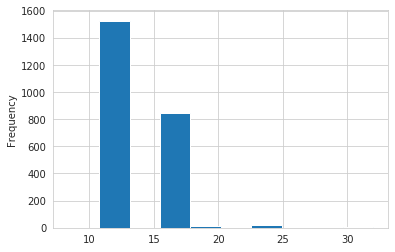

In [13]:
all_beer['ounces'].plot(kind='hist')

In [14]:
all_beer['style'].value_counts()

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Braggot                             1
Kristalweizen                       1
Other                               1
Wheat Ale                           1
Flanders Oud Bruin                  1
Name: style, Length: 99, dtype: int64

In [15]:
all_beer['IPA'] = all_beer['style'].str.contains('IPA', case=False)

In [16]:
all_beer['IPA'].value_counts()

False    1834
True      571
Name: IPA, dtype: int64

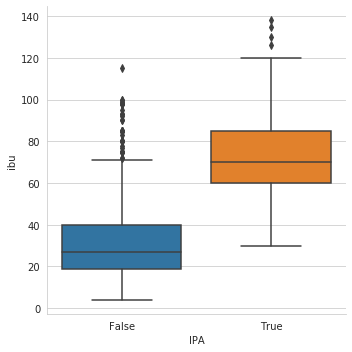

In [17]:
sns.catplot(data=all_beer, x='IPA', y='ibu', kind='box')

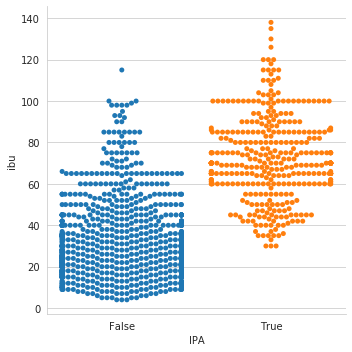

In [18]:
sns.catplot(data=all_beer, x='IPA', y='ibu', kind='swarm')

In [19]:
fig = px.scatter(all_beer, x="abv", y="ibu")
fig.show()

In [20]:
fig = px.scatter(all_beer, x="abv", y="ibu", color='state', hover_name='name_beer')
fig.show()

In [21]:
fig = px.scatter(all_beer, x="abv", y="ibu", color='state', hover_name='name_beer')
fig.show()

In [23]:
mn_beer = all_beer[all_beer['state'].str.contains('MN')].copy()

In [24]:
fig = px.scatter(mn_beer, x="abv", y="ibu", color='state', hover_name='name_beer', hover_data=['name_brewery'])
fig.show()